In [22]:
## Bopston house price prediction usking sklearn

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
boston = load_boston()

In [24]:
X = boston.data
y = boston.target

print(X.shape, y.shape)

(506, 13) (506,)


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


## Using Sklearn

In [26]:
## training data

lr = LinearRegression(normalize=True)   ## created an object
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [27]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [28]:
print(lr.coef_)              ## 13 coefficients
print(lr.intercept_)    ## the bias or intercept

[-1.05039229e-01  4.64699806e-02  1.69075694e-03  3.18755668e+00
 -1.69919370e+01  3.93804743e+00  4.17906741e-04 -1.44138971e+00
  3.07383080e-01 -1.21814158e-02 -9.59733632e-01  9.81823813e-03
 -5.08284911e-01]
34.98954069121269


In [29]:
print(lr.score(X_train,y_train))

0.7546808235994203


## From Scratch

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
ones = np.ones([X_train.shape[0],1])

X_train = np.hstack([ones,X_train])

In [32]:
def hypothesis(X,theta):
    
    return np.sum(np.dot(X,theta.T))

In [33]:
def error(X,y,theta):
    
    m = X.shape[0]
    err = 0
    
    for ix in range(m):
        
        hx = hypothesis(X[ix],theta)
        err += (hx-y[ix])**2
        
    return err/m

In [39]:
def grad(X,y,theta):
    
    grad = np.zeros((X.shape[1],))
    m = X.shape[0]
    
    for ix in range(m):
        
        for jx in range(X.shape[1]):
            
            hx = hypothesis(X[ix],theta)
            grad[jx] += ((-hx + y[ix])*X[ix][jx])
        
    return grad/m

In [44]:
def gradientDescent(X,y,learning_rate=0.0001):
    
    theta = np.zeros((X.shape[1],))  #theta is zero in the beg.
    itr = 0
    max_itr = 10
    error_list = []
    
    while(itr<=max_itr):      #doing updation of theta for a fixed no. of values
        
        gradient = grad(X,y,theta)
        e = error(X,y,theta)
        print(e)
        error_list.append(e)                                   #list or error for all the iterations
            
        for ix in range(X.shape[1]):
            
            theta[ix] = theta[ix] - learning_rate*(gradient[ix])
            
        itr += 1
        
    return theta,error_list

In [45]:
final_theta, error_list = gradientDescent(X_train,y_train)

##print(final_theta)

591.6359653465342
467876.9276456279
483405554.3457956
500271416374.04016
517734707865397.44
5.358077094099709e+17
5.5451160174859275e+20
5.73868406673109e+23
5.939009159396279e+26
6.146327169302565e+29
6.3608822041195666e+32


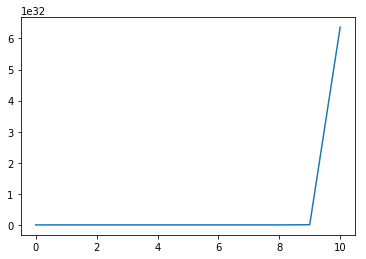

In [46]:
plt.plot(error_list)

In [47]:
print(error_list)

[591.6359653465342, 467876.9276456279, 483405554.3457956, 500271416374.04016, 517734707865397.44, 5.358077094099709e+17, 5.5451160174859275e+20, 5.73868406673109e+23, 5.939009159396279e+26, 6.146327169302565e+29, 6.3608822041195666e+32]
